In [235]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from lab_utils_multi import  norm_plot
from lab_utils_multi import  run_gradient_descent 
from lab_utils_common import dlc

### (1) Reading and preprocessing the dataset

In [236]:

insurance_data = pd.read_csv('insurance.csv') 
insurance_data['sex'] = insurance_data['sex'].astype('category').cat.codes
insurance_data['smoker'] = insurance_data['smoker'].astype('category').cat.codes
insurance_data['region'] = insurance_data['region'].astype('category').cat.codes

X_train_all_data = insurance_data.iloc[:, :-1].values # first ":" - means all rows, second ":-1" - means all columns except the last one
y_train_all_data = insurance_data['charges'].values
X_features = list(insurance_data.columns)
X_train_all_data.shape, y_train_all_data.shape



((1338, 6), (1338,))

### (2) Plotting each feature

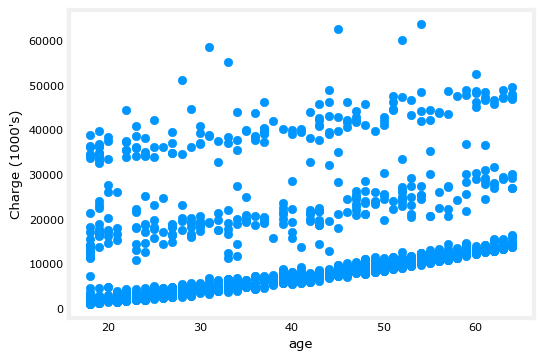

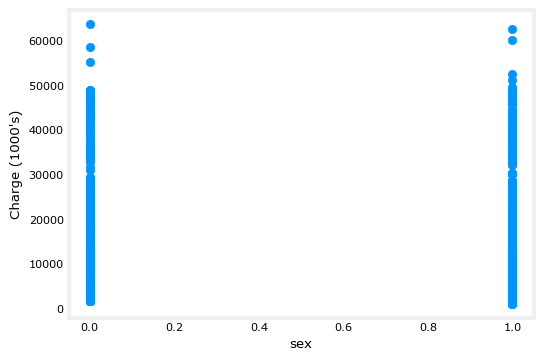

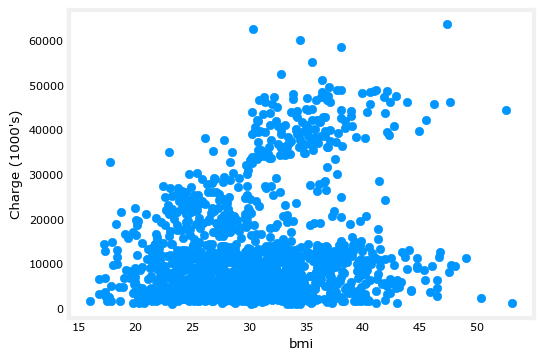

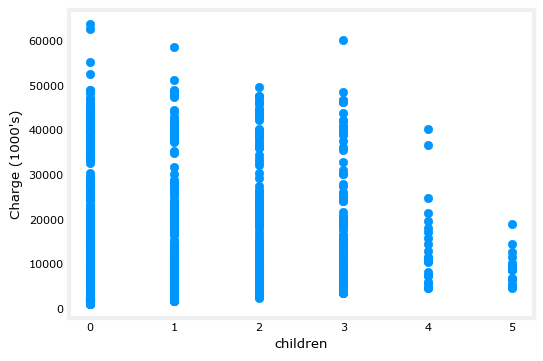

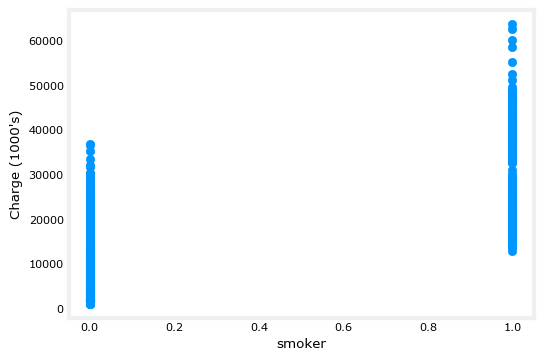

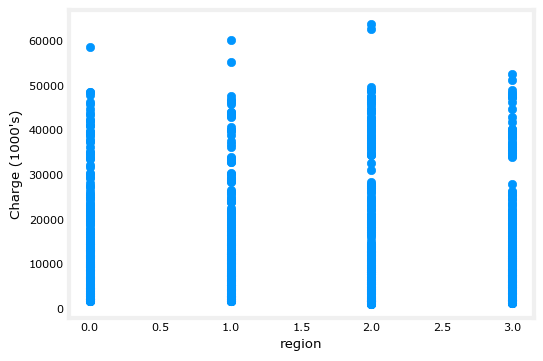

In [237]:

for i in range(X_train_all_data.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train_all_data[:, i], y_train_all_data)
    plt.xlabel(X_features[i])
    plt.ylabel("Charge (1000's)")
    plt.show()



### (3) Separating the dataset into Train and Validation

In [238]:
# (3)
# 80% train, 20% validation (train our model using 80% of given data, then test the model with the rest 20% of data which the model hasn't seen yet)
X_train, x_validation, y_train, y_validation = train_test_split(X_train_all_data, y_train_all_data, test_size=0.2, random_state=9)
X_train.shape, x_validation.shape


((1070, 6), (268, 6))

In [239]:
y_train.shape, y_validation.shape

((1070,), (268,))

### (4) Gradient Descent Algorithm

In [240]:

def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [241]:
# Initialize vector w and b
b_init = 0
w_init = np.zeros(len(X_train[0]))
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")


cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

w_init shape: (6,), b_init type: <class 'int'>
Cost at optimal w : 162486533.61381915


In [242]:
len(X_train[0])

6

In [243]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [244]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13309.57781097104
dj_dw at initial w,b: 
 [-571114.39443657   -7248.45312666 -421511.6342028   -15683.90422536
   -6669.54534663  -20073.73298049]


In [245]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

### Alpha = 1e-4

In [257]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10
# if alpha = 1e-3, overshoot happens and the cost increases, maybe 1e-4 is the best learning rate...
# if alpha = 1e-5, cost decreases, but decreases slowly
alpha = 1e-4
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(25): # just to see some results
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 118605466.14   
Iteration    1: Cost 94662503.05   
Iteration    2: Cost 81598098.98   
Iteration    3: Cost 74469216.38   
Iteration    4: Cost 70578852.33   
Iteration    5: Cost 68455477.52   
Iteration    6: Cost 67296201.26   
Iteration    7: Cost 66662953.11   
Iteration    8: Cost 66316714.63   
Iteration    9: Cost 66127073.40   
b,w found by gradient descent: 4.73,[207.94619676   2.83994703 153.49503246   6.22924512   4.88993717
   6.99822713] 
prediction: 16068.07, target value: 11658.37915
prediction: 14395.62, target value: 18806.14547
prediction: 11028.27, target value: 19673.33573
prediction: 15028.83, target value: 42111.6647
prediction: 12493.50, target value: 21082.16
prediction: 8760.26, target value: 2154.361
prediction: 16454.81, target value: 28923.13692
prediction: 12420.25, target value: 6457.8434
prediction: 15475.02, target value: 7448.40395
prediction: 16860.77, target value: 11394.06555
prediction: 17279.05, target value: 14988.432
predic

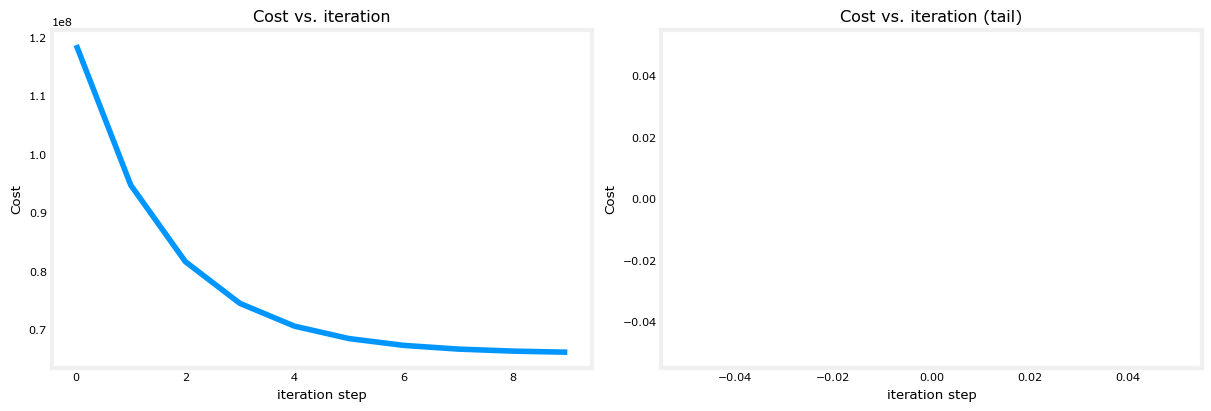

In [258]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:]) # all elements other than 1st 100
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### (5) Determining the R(squared) score

In [248]:
# shows the correctness of the prediction
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denum = np.sum((y - y.mean())**2)

    score = 1 - num / denum
    return score

In [249]:
size = len(X_train)
y_predicted_train = [(np.dot(X_train[i], w_final) + b_final) for i in range(size)]

In [250]:
y_predicted_train[0]

16068.07316129711

In [251]:
# the greater the r2 score the more correct our prediction is
r2_score(y_train, y_predicted_train) # between 0 and 1.
# THE R SCORE BELOW CAN INDICATE TWO THINGS:
# 1. Our trained model doesn't fit the data well, in other words, our model cannot predict correctly, it is too far from the target values
# 2. The output or the y_train(dependent variable) value doesn't necessarily depend on X_train values(independent values)

0.1053524180352573

In [252]:
val_size = len(x_validation)
y_predicted_validation = [(np.dot(X_train[i], w_final) + b_final) for i in range(val_size)]

In [253]:
r2_score(y_validation, y_predicted_validation)

-0.039663472969672764

#### THE R SCORE ABOVE CAN INDICATE TWO THINGS:
#####  1. Our trained model doesn't fit the data well, in other words, our model cannot predict correctly, it is too far from the target values
#####  2. The output or the y_train(dependent variable) value doesn't necessarily depend on X_train values(independent values)

### (6) Normalizing the features

In [259]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [260]:
# normalize the data and compare it to the original data
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [39.02056075  0.51308411 30.61534112  1.08224299  0.20934579  1.50841121], 
X_sigma = [14.03205768  0.49982878  6.18171517  1.18745885  0.40684166  1.10792569]
Peak to Peak range by column in Raw        X:[46.    1.   37.17  5.    1.    3.  ]
Peak to Peak range by column in Normalized X:[3.27820773 2.00068513 6.01289432 4.21067223 2.45795873 2.70776282]


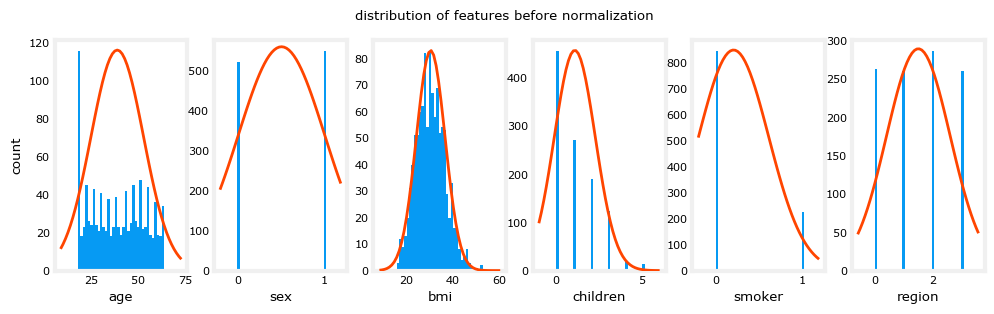

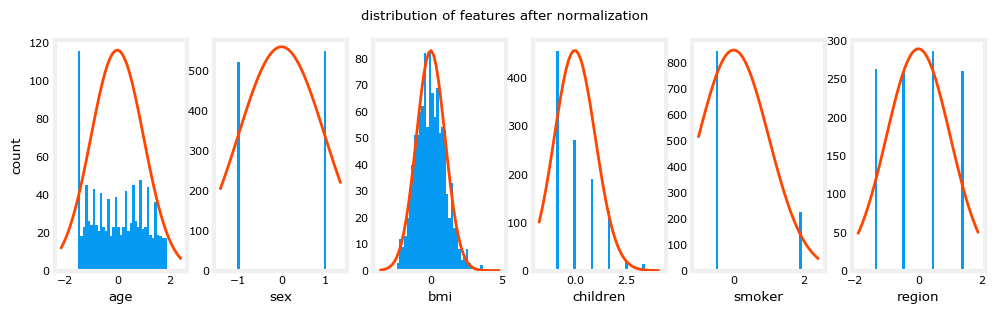

In [261]:
fig,ax=plt.subplots(1, 6, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,6,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

In [270]:
iterations = 10
alpha = 1 # this might not be the best alpha value, but I tried different alphas, decided to stick to this one...
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(25): # just to see some results
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 19609091.84   
Iteration    1: Cost 18938114.06   
Iteration    2: Cost 18920900.23   
Iteration    3: Cost 18920175.25   
Iteration    4: Cost 18920140.22   
Iteration    5: Cost 18920138.48   
Iteration    6: Cost 18920138.40   
Iteration    7: Cost 18920138.39   
Iteration    8: Cost 18920138.39   
Iteration    9: Cost 18920138.39   
b,w found by gradient descent: 13309.58,[3601.52082515  -28.49366908 1936.05586574  532.40786676 9613.05095769
 -332.49498482] 
prediction: 12144.51, target value: 11658.37915
prediction: 11090.95, target value: 18806.14547
prediction: 6177.73, target value: 19673.33573
prediction: 35318.83, target value: 42111.6647
prediction: 30748.85, target value: 21082.16
prediction: 1989.90, target value: 2154.361
prediction: 11948.72, target value: 28923.13692
prediction: 8212.94, target value: 6457.8434
prediction: 12715.57, target value: 7448.40395
prediction: 14302.41, target value: 11394.06555
prediction: 13139.71, target value: 14988.432

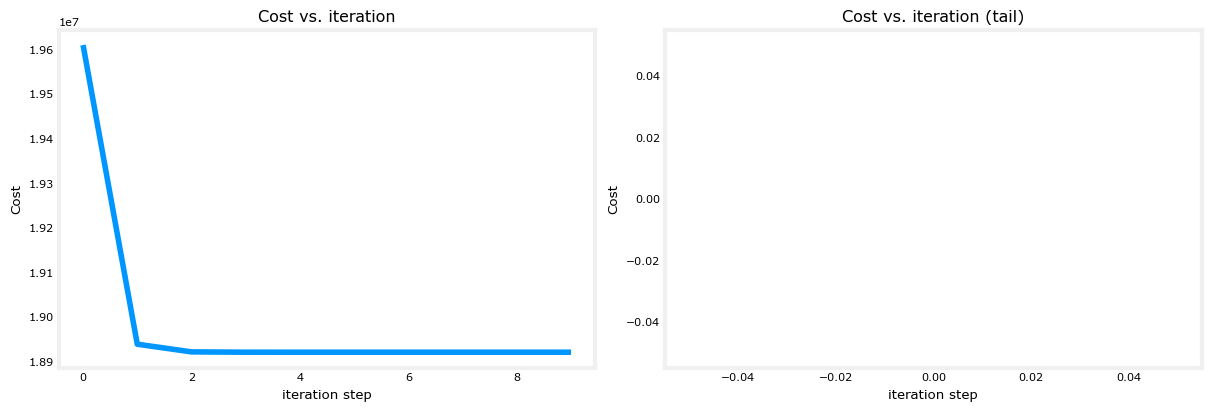

In [271]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:]) # all elements other than 1st 100
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

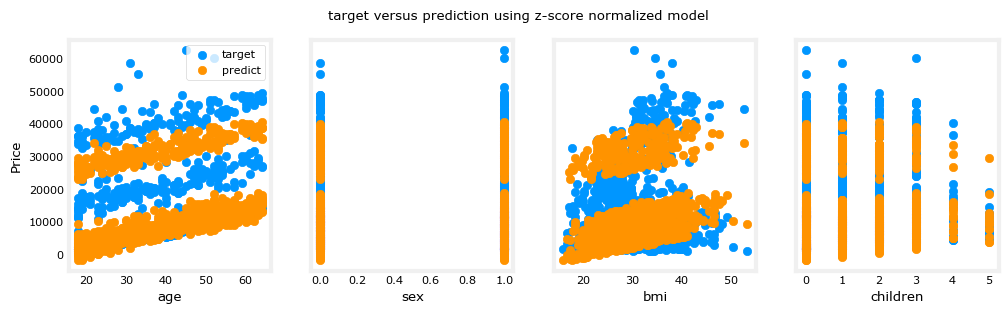

In [264]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

##### The R score of normilized data is much closer to 1. It means if we normilize the training data, we can get more ACCURATE
##### target values and get them FAST (cost function decreases faster with normilized values)

In [265]:
n_size = len(X_norm)
y_predicted_train_norm = [(np.dot(X_norm[i], w_final) + b_final) for i in range(n_size)]

In [266]:
r2_score(y_train, y_predicted_train_norm)

0.7440253259062457

In [267]:
X_norm_val, X_mu_val, X_sigma_val = zscore_normalize_features(x_validation)

In [268]:
l = len(X_norm_val)
y_predicted_train_norm_val = [(np.dot(X_norm_val[i], w_final) + b_final) for i in range(l)]

In [269]:
r2_score(y_validation, y_predicted_train_norm_val)

0.7794970165473667

### (7) Determining feature importance

In [280]:
data = insurance_data.drop(columns=insurance_data.columns[-1])


<Axes: ylabel='Feature'>

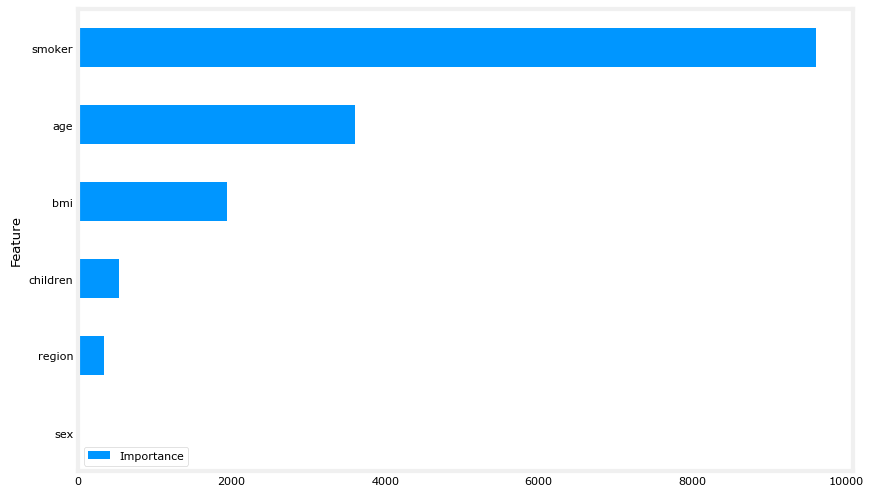

In [281]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))